In [1]:
! pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install mysql-connector-python



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [ ]:
#importing all movie list
data=pd.read_csv('D:/Guvi/all_movies_list.csv')

In [ ]:
#display the data
display(data)

,Movie_Name,Genre,Duration,Ratings,Voting_counts
0,Sketch,Adventure,1h 33m,6.9,2.5K
1,Dune: Part Two,Adventure,2h 46m,8.5,662K
2,Freaky Tales,Adventure,1h 47m,6.3,12K
3,Gladiator II,Adventure,2h 28m,6.5,271K
4,Deadpool & Wolverine,Adventure,2h 8m,7.5,525K
...,...,...,...,...,...
2836,Unexplained Mysteries of the World,Mystery,NaN,NaN,NaN
2837,Dave Gentic & Headgun,Mystery,57m,NaN,NaN
2838,The Hauntologist,Mystery,55m,NaN,NaN
2839,The Veyshal Movie,Mystery,2h,NaN,NaN


In [ ]:
#display the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841 entries, 0 to 2840
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Name     2841 non-null   object 
 1   Genre          2841 non-null   object 
 2   Duration       2361 non-null   object 
 3   Ratings        1952 non-null   float64
 4   Voting_counts  1952 non-null   object 
dtypes: float64(1), object(4)
memory usage: 111.1+ KB


In [9]:
# Finding no.of rows and columns
print(len(data))   
print(data.shape) 


2841
(2841, 5)


In [ ]:
#create a function for cleaning the duration column
def duration_to_minutes(d):
    # Handle NaN or non-string values
    if pd.isna(d):
        return None

    d = str(d).strip()   # make sure it's a string
    h, m = 0, 0

    if "h" in d:
        h = int(d.split("h")[0].strip())
        if "m" in d:
            m = int(d.split("h")[1].replace("m", "").strip() or 0)
    elif "m" in d:
        m = int(d.replace("m", "").strip())

    return h * 60 + m


In [ ]:
#convert the hour & minute to only minutes and stored column name as Duration_mins
data["Duration_mins"] = data["Duration"].apply(duration_to_minutes)

In [ ]:
#drop Duration because we have created a cleaned duration column
data.drop("Duration",axis=1,inplace=True)

In [13]:
#create a function for cleaning the voting column
def convert_votes(v):
    if pd.isna(v):
        return None
    v = str(v).lower().strip()

    if "k" in v:   # thousands
        return float(v.replace("k", "")) * 1000
    elif "m" in v: # millions
        return float(v.replace("m", "")) * 1_000_000
    else:
        return float(v)


In [14]:
#stored cleaned data in to new column named as voting_counts_clean
data["Voting_counts_clean"] = data["Voting_counts"].apply(convert_votes)


In [15]:
#drop Voting_counts
data.drop("Voting_counts",axis=1,inplace=True)

In [17]:
#subset is used to filter duplicates value by columns#
data=data.drop_duplicates(subset="Movie_Name",keep="first")
data

,Movie_Name,Genre,Ratings,Duration_mins,Voting_counts_clean
0,Sketch,Adventure,6.9,93.0,2500.0
1,Dune: Part Two,Adventure,8.5,166.0,662000.0
2,Freaky Tales,Adventure,6.3,107.0,12000.0
3,Gladiator II,Adventure,6.5,148.0,271000.0
4,Deadpool & Wolverine,Adventure,7.5,128.0,525000.0
...,...,...,...,...,...
2835,Luk Thep Tom 3,Mystery,NaN,70.0,NaN
2836,Unexplained Mysteries of the World,Mystery,NaN,NaN,NaN
2837,Dave Gentic & Headgun,Mystery,NaN,57.0,NaN
2838,The Hauntologist,Mystery,NaN,55.0,NaN


In [18]:
#to check missing values#
data.isna().sum()

Movie_Name               0
Genre                    0
Ratings                819
Duration_mins          442
Voting_counts_clean    819
dtype: int64

In [ ]:
#drop the nan value these 3 column couldnot fill with the correct value so that i removed nan values
data = data.dropna(subset=["Ratings", "Voting_counts_clean","Duration_mins"])
display(data)

,Movie_Name,Genre,Ratings,Duration_mins,Voting_counts_clean
0,Sketch,Adventure,6.9,93.0,2500.0
1,Dune: Part Two,Adventure,8.5,166.0,662000.0
2,Freaky Tales,Adventure,6.3,107.0,12000.0
3,Gladiator II,Adventure,6.5,148.0,271000.0
4,Deadpool & Wolverine,Adventure,7.5,128.0,525000.0
...,...,...,...,...,...
2756,Belyy parokhod,Mystery,7.7,97.0,10.0
2757,So It Goes,Mystery,3.2,77.0,19.0
2784,Lealtad o Morir,Mystery,8.5,87.0,11.0
2785,Once Passed On,Mystery,6.6,91.0,7.0


In [23]:
# rename the column name
data.rename(columns={
    "Voting_counts_clean":"Voting_counts",
    "Duration_mins":"Duration"
}, inplace=True)


In [ ]:
#converting cleaned movie data in to csv file

import pandas as pd
df=pd.DataFrame(data)
df.to_csv(r"D:\Guvi\cleaned_data.csv", index=False, encoding="utf-8")
print("CSV file saved successfully in D:\\Guvi!")

CSV file saved successfully in D:\Guvi!


In [24]:
#cleaned final data
display(data)

,Movie_Name,Genre,Ratings,Duration,Voting_counts
0,Sketch,Adventure,6.9,93.0,2500.0
1,Dune: Part Two,Adventure,8.5,166.0,662000.0
2,Freaky Tales,Adventure,6.3,107.0,12000.0
3,Gladiator II,Adventure,6.5,148.0,271000.0
4,Deadpool & Wolverine,Adventure,7.5,128.0,525000.0
...,...,...,...,...,...
2756,Belyy parokhod,Mystery,7.7,97.0,10.0
2757,So It Goes,Mystery,3.2,77.0,19.0
2784,Lealtad o Morir,Mystery,8.5,87.0,11.0
2785,Once Passed On,Mystery,6.6,91.0,7.0


In [ ]:
print(len(data))   # number of rows (movies)
print(data.shape)  # (rows, columns)

1458
(1458, 5)


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 2786
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Name     1458 non-null   object 
 1   Genre          1458 non-null   object 
 2   Ratings        1458 non-null   float64
 3   Duration       1458 non-null   float64
 4   Voting_counts  1458 non-null   float64
dtypes: float64(3), object(2)
memory usage: 68.3+ KB


In [27]:
#to check missing values#
data.isna().sum()

Movie_Name       0
Genre            0
Ratings          0
Duration         0
Voting_counts    0
dtype: int64

In [28]:
#Top 10 movies by Rating#
top10_rated = data.nlargest(10, "Ratings")

# Display
display(top10_rated)


,Movie_Name,Genre,Ratings,Duration,Voting_counts
2438,Tears of Blood,Mystery,9.7,88.0,8.0
2614,American Dirge,Mystery,9.7,81.0,6.0
743,Among Neighbors,Animation,9.6,100.0,54.0
1412,It'll Never Work,Biography,9.6,57.0,31.0
2640,A kiút,Mystery,9.6,47.0,60.0
1277,Don't Ever Stop,Biography,9.5,85.0,34.0
2372,The Choice,Mystery,9.5,40.0,8.0
307,Colour Palette,Adventure,9.4,87.0,53.0
363,A Christmas Carol,Adventure,9.4,39.0,14.0
518,The Long Quiet,Adventure,9.4,94.0,5.0


In [29]:
#top 10 movies by voting
top10_votes = data.nlargest(10, "Voting_counts")
display(top10_votes)


,Movie_Name,Genre,Ratings,Duration,Voting_counts
1,Dune: Part Two,Adventure,8.5,166.0,662000.0
4,Deadpool & Wolverine,Adventure,7.5,128.0,525000.0
6,Furiosa: A Mad Max Saga,Adventure,7.5,148.0,300000.0
3,Gladiator II,Adventure,6.5,148.0,271000.0
19,Inside Out 2,Adventure,7.5,96.0,230000.0
2145,Nosferatu,Mystery,7.2,132.0,230000.0
2147,Longlegs,Mystery,6.6,101.0,202000.0
5,The Wild Robot,Adventure,8.2,102.0,195000.0
8,Twisters,Adventure,6.5,122.0,182000.0
11,Kingdom of the Planet of the Apes,Adventure,6.8,145.0,159000.0


In [32]:
! pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 3.8 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 3.9 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 3.5 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 3.5 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 3.5 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 3.4 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 3.5 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.3 MB 3.5 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.3 MB 2.3 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.


Genre
Adventure    426
Mystery      388
Biography    281
Family       222
Animation    141
Name: count, dtype: int64

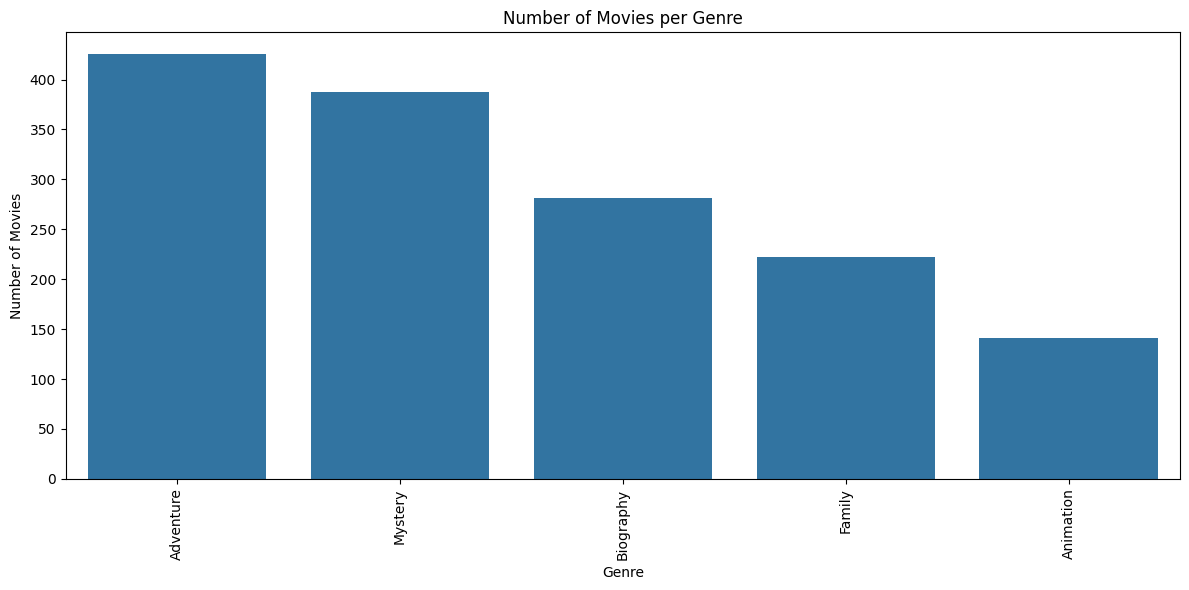

In [33]:
#bar plot for Genre distrubution
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each genre
genre_counts = data['Genre'].value_counts()
display(genre_counts)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Genre
Biography    103.491103
Family       102.828829
Mystery      100.229381
Adventure     97.920188
Animation     89.517730
Name: Duration, dtype: float64

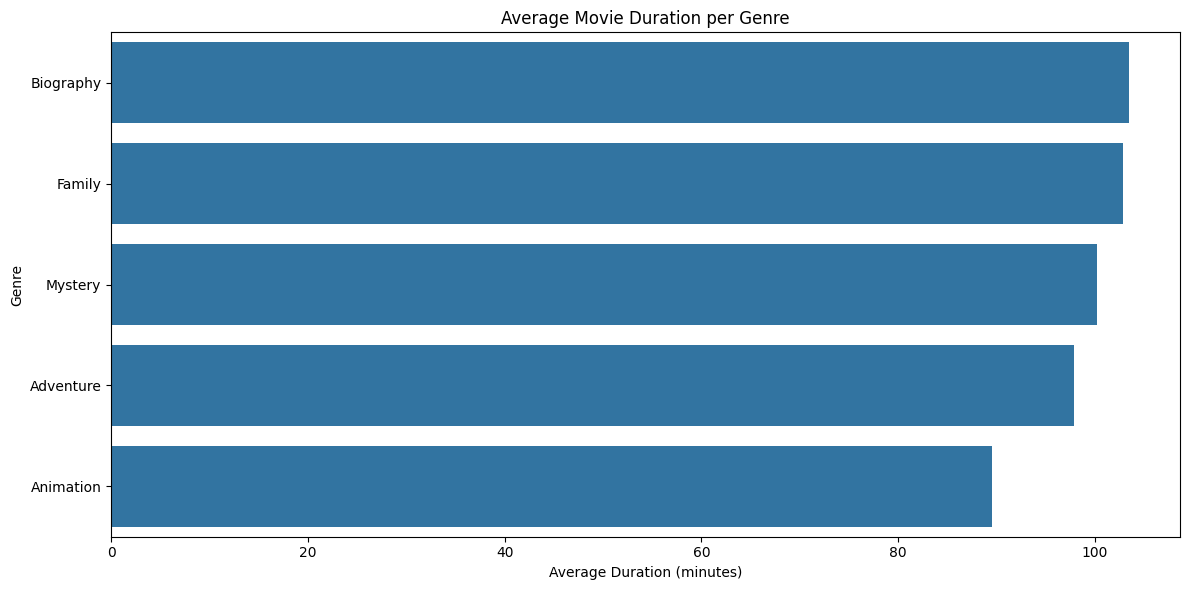

In [34]:
# Average duration per genre
average_duration_by_genre = data.groupby('Genre')['Duration'].mean().sort_values(ascending=False)
display(average_duration_by_genre)
# Create a horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_duration_by_genre.values, y=average_duration_by_genre.index, orient='h')
plt.title('Average Movie Duration per Genre')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

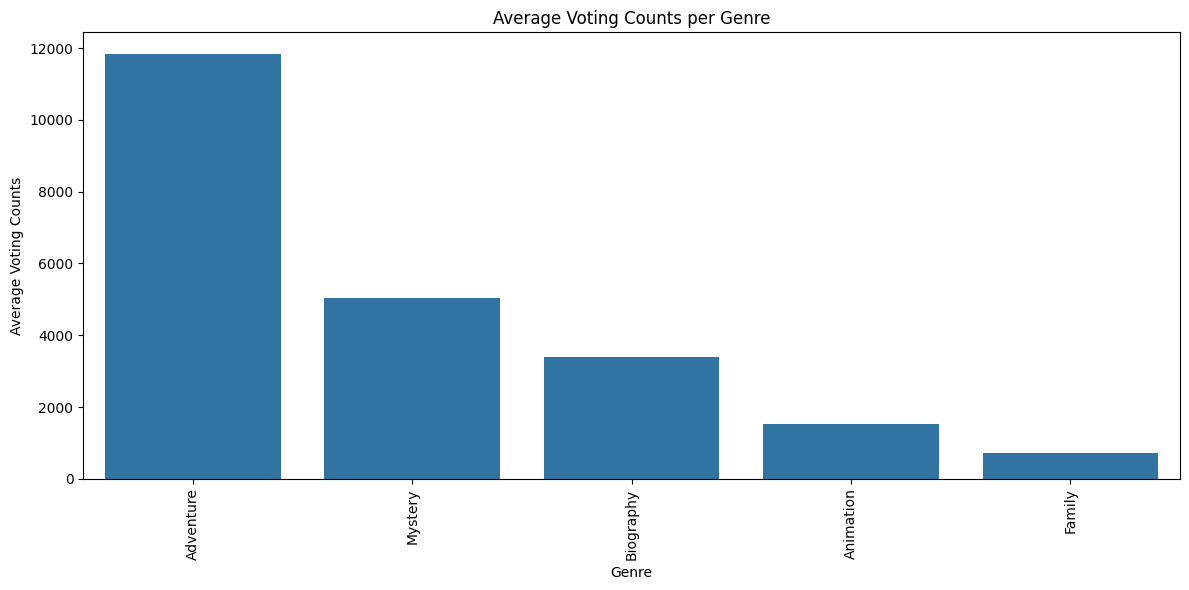

In [35]:
# Voting trends by genre# average voting counts per genre
average_votes_by_genre = data.groupby('Genre')['Voting_counts'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_votes_by_genre.index, y=average_votes_by_genre.values)
plt.title('Average Voting Counts per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Voting Counts')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

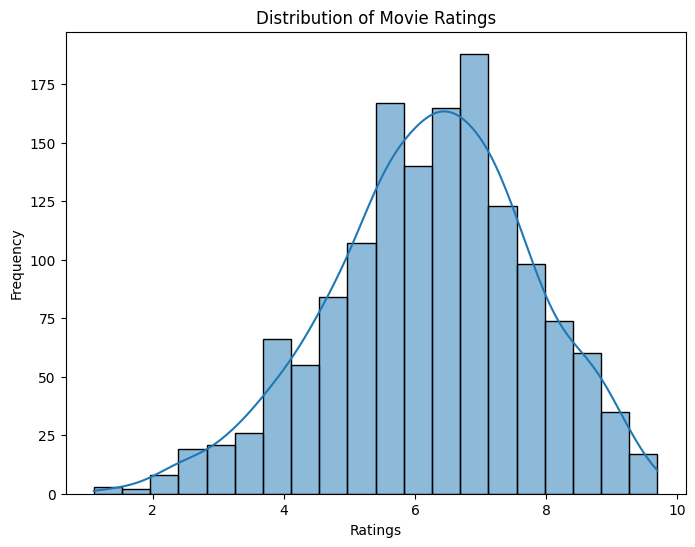

In [36]:
# Create a histogram for movie ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Ratings'], bins=20, kde=True) # You can adjust the number of bins
plt.title('Distribution of Movie Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [37]:
# Find the top-rated movie for each genre
top_rated_per_genre = data.loc[data.groupby('Genre')['Ratings'].idxmax()]

# Display the top-rated movies
display(top_rated_per_genre)

,Movie_Name,Genre,Ratings,Duration,Voting_counts
307,Colour Palette,Adventure,9.4,87.0,53.0
743,Among Neighbors,Animation,9.6,100.0,54.0
1412,It'll Never Work,Biography,9.6,57.0,31.0
1848,Tarpana,Family,9.4,138.0,20.0
2438,Tears of Blood,Mystery,9.7,88.0,8.0


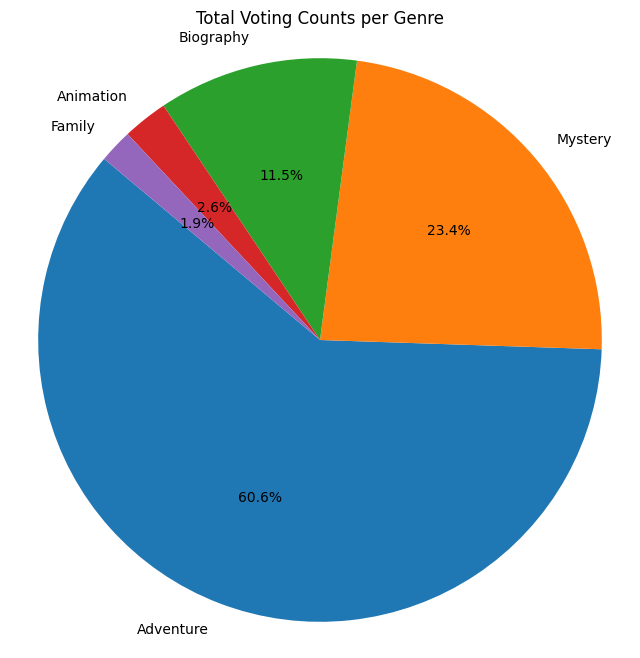

In [38]:
# Calculate the total voting counts per genre
total_votes_by_genre = data.groupby('Genre')['Voting_counts'].sum().sort_values(ascending=False)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_votes_by_genre, labels=total_votes_by_genre.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Voting Counts per Genre')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [39]:
# Sort by duration to find shortest and longest
shortest_movies = data.nsmallest(5,'Duration')
longest_movies = data.nlargest(5,'Duration')

print("Shortest Movies:")
display(shortest_movies)

print("\nLongest Movies:")
display(longest_movies)

Shortest Movies:


,Movie_Name,Genre,Ratings,Duration,Voting_counts
546,Kyle and the Last Emerald 2,Adventure,8.4,15.0,9.0
331,Two Breaths,Adventure,8.0,18.0,56.0
1386,Gevart,Biography,7.3,34.0,70.0
363,A Christmas Carol,Adventure,9.4,39.0,14.0
2306,Granny,Mystery,7.3,40.0,9.0



Longest Movies:


,Movie_Name,Genre,Ratings,Duration,Voting_counts
567,Lajjpal,Adventure,9.0,252.0,8.0
1188,Chhatrapati Sambhaji,Biography,5.4,186.0,238.0
1113,Maidaan,Biography,7.9,181.0,23000.0
46,Kalki 2898 AD,Adventure,7.0,180.0,70000.0
13,The Count of Monte-Cristo,Adventure,7.6,178.0,40000.0


,Genre,Ratings
0,Adventure,6.000235
1,Animation,6.662411
2,Biography,6.896085
3,Family,6.153153
4,Mystery,5.895361


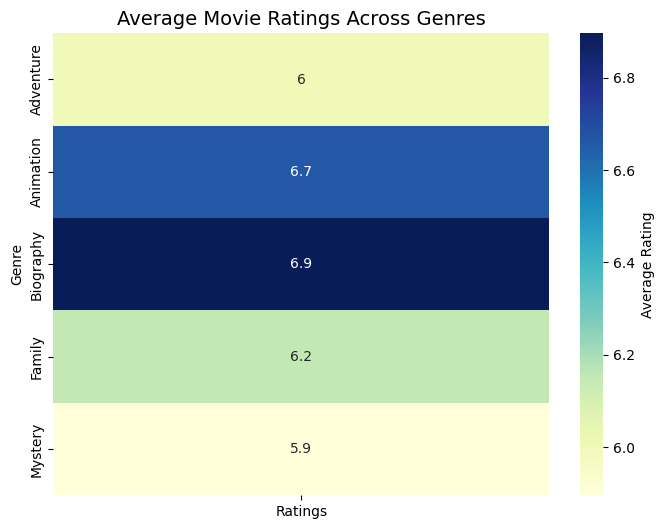

In [ ]:
#Ratings by genre using heatmap
genre_avg = data.groupby("Genre")["Ratings"].mean().reset_index()
display(genre_avg)

# Pivot (genres as rows, one column "Ratings")
pivot = genre_avg.pivot_table(index="Genre", values="Ratings")

# === Step 5: Heatmap ===
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Average Rating'})
plt.title("Average Movie Ratings Across Genres", fontsize=14)
plt.ylabel("Genre")
plt.xlabel("")
plt.show()

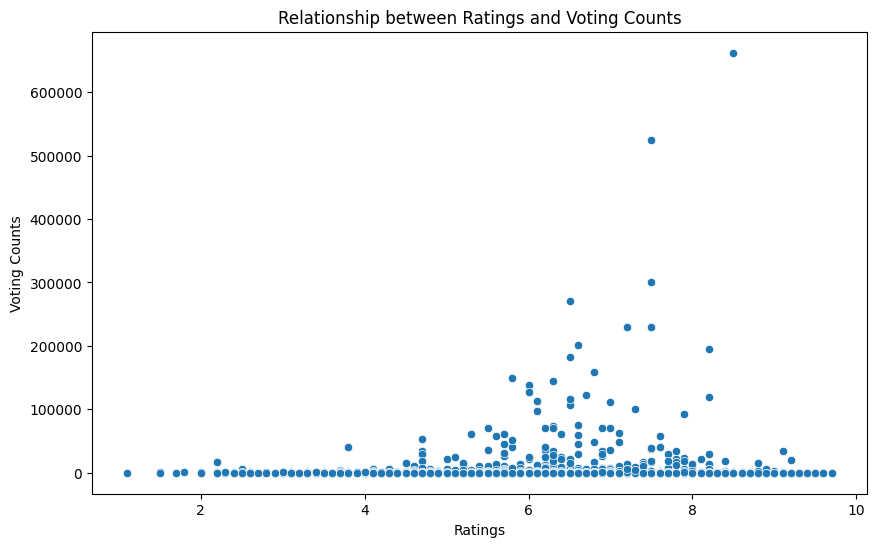

In [41]:
# Analyze the relationship between ratings and voting counts using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Ratings'], y=data['Voting_counts'])
plt.title('Relationship between Ratings and Voting Counts')
plt.xlabel('Ratings')
plt.ylabel('Voting Counts')
plt.show()